In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib as mp
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

2021-09-23 12:00:29.729357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-23 12:00:29.729381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_data = pd.read_csv("~/training/digit-recognizer/train.csv")
test_data = pd.read_csv("~/training/digit-recognizer/test.csv")

In [3]:
train_data.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = train_data['label']
X = train_data.loc[:, train_data.columns != 'label']

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.80)
X_test = test_data

In [7]:
print(X_train.shape, X_val.shape, X_test.shape)

(33600, 784) (8400, 784) (28000, 784)


In [8]:
def convertTo28x28(data):
    return np.array(data).reshape(-1, 28, 28, 1)

In [9]:
X_train = convertTo28x28(X_train)
X_val = convertTo28x28(X_val)
X_test = convertTo28x28(X_test)

In [10]:
print(X_train.shape, X_val.shape, X_test.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1) (28000, 28, 28, 1)


In [19]:
model = keras.Sequential([
    keras.Input(X_train[0].shape),
    layers.Conv2D(32, 3, strides=(2,2), padding = 'valid', activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size = (3,3), strides = (1,1), padding = 'valid'),

    layers.Conv2D(64, 3, strides=(2,2), padding = 'valid', activation = 'relu'),
    layers.BatchNormalization(),
    # layers.AveragePooling2D(pool_size = (3,3), strides = (1,1), padding = 'valid'),
    layers.MaxPool2D(pool_size = (3,3), strides = (1,1), padding = 'valid'),

    layers.Conv2D(128, 3, strides=(2,2), padding = 'valid', activation = 'relu'),

    layers.Flatten(),


    layers.Dense(256, activation='leaky_relu'),
    layers.Dense(512, activation='relu', kernel_regularizer='l1_l2'),
    # layers.Dense(1024, activation='relu', kernel_regularizer='l1_l2'),
    # layers.Dense(512, activation='relu', kernel_regularizer='l1_l2'),
    layers.Dense(256, activation='relu', kernel_regularizer='l1_l2'),
    layers.Dense(128, activation='relu', kernel_regularizer='l1_l2'),
    layers.Dense(32, activation='relu', kernel_regularizer='l1_l2'),
    # layers.Dense(10, activation='relu', kernel_regularizer='l1_l2'),
    layers.Dense(10, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 128)         7

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [14]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=70,
    callbacks=[early_stopping],
    # verbose=0, # hide the output because we have so many epochs
)

2021-09-23 12:00:34.243959: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
66/66 [==============================] - 6s 76ms/step - loss: 73.3186 - accuracy: 0.5800 - val_loss: 21.3543 - val_accuracy: 0.2902
Epoch 2/50
66/66 [==============================] - 6s 85ms/step - loss: 7.2426 - accuracy: 0.8338 - val_loss: 3.2206 - val_accuracy: 0.6505
Epoch 3/50
66/66 [==============================] - 5s 83ms/step - loss: 1.9469 - accuracy: 0.9079 - val_loss: 1.5516 - val_accuracy: 0.9069
Epoch 4/50
66/66 [==============================] - 5s 82ms/step - loss: 1.3318 - accuracy: 0.9356 - val_loss: 1.2809 - val_accuracy: 0.9237
Epoch 5/50
66/66 [==============================] - 5s 69ms/step - loss: 1.1248 - accuracy: 0.9502 - val_loss: 1.1989 - val_accuracy: 0.9090
Epoch 6/50
66/66 [==============================] - 5s 71ms/step - loss: 1.0104 - accuracy: 0.9584 - val_loss: 1.0151 - val_accuracy: 0.9458
Epoch 7/50
66/66 [==============================] - 5s 70ms/step - loss: 0.9314 - accuracy: 0.9636 - val_loss: 0.9440 - val_accuracy: 0.9539
Epoch 8/50


<AxesSubplot:>

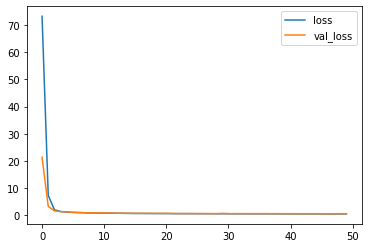

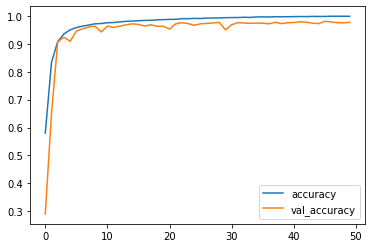

In [16]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 0
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

In [17]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis=1)
print(predictions.shape)

(28000,)


In [18]:
output = pd.DataFrame({'ImageId': list(range(1,1+len(predictions))), 'Label': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
